Observable Trends
1. In comparing the temperature vs. the latitude of the sample cities, it is observable that it is winter in the northern hemisphere as the latitudes to the north of the equator are showing lower maximum temperatures for the day. 

2. Cloudiness is fairly evenly distributed among different latitudes. 

3. Cities between the 20th and 60th degrees of latitude north of the equator show the largest variation in recorded humidity.



In [1]:
import json
import random
import requests
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import seaborn as sns
import numpy
import os
import datetime

In [2]:
file_name = os.path.join("worldcities.csv")
city_pd = pd.read_csv(file_name)

In [3]:
sample_cities = city_pd.sample(n=600)

In [4]:
sample_cities['Temperature'] = ""
sample_cities['Humidity'] = ""
sample_cities['Cloudiness'] = ""
sample_cities['Wind Speed'] = ""
sample_cities.head()

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
31052,pl,bystrzyca klodzka,50.298252,16.653029,,,,
28581,ph,lapuyan,7.637900,123.194400,,,,
22410,lt,palanga,55.917500,21.068611,,,,
34499,ro,tisau,45.166667,26.516667,,,,
5880,cn,chengzihe,45.333333,131.066667,,,,


In [5]:
file_name = "/Users/acollier/Documents/api_keys.json"
data = json.load(open(file_name))
gkey = data['open_weather_api_key']
units= "imperial"

In [6]:
counter = 0
skip_count = 0

for index, row in sample_cities.iterrows():
    target_city = str(row['City'])
     
    url = "http://api.openweathermap.org/data/2.5/weather?"
    target_url = url + "appid=" + gkey + "&q=" + target_city + "&units=" + units
    cities_weather = requests.get(target_url).json()

    try:
        sample_cities.set_value(index, "Temperature", cities_weather["main"]["temp"])
        sample_cities.set_value(index, "Humidity", cities_weather["main"]["humidity"])
        sample_cities.set_value(index, "Cloudiness", cities_weather["clouds"]["all"])
        sample_cities.set_value(index, "Wind Speed", cities_weather["wind"]["speed"])
        counter = counter + 1
        print("City Number: " + str(counter) + " City: " + target_city + " " + target_url)
    
    except:
        skip_count += 1
        print("Skip Number: " + str(skip_count) + "City: " + target_city + " Missing field... skipping.")


City Number: 1 City: bystrzyca klodzka http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bystrzyca klodzka&units=imperial
City Number: 2 City: lapuyan http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lapuyan&units=imperial
City Number: 3 City: palanga http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=palanga&units=imperial
City Number: 4 City: tisau http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tisau&units=imperial
City Number: 5 City: chengzihe http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chengzihe&units=imperial
City Number: 6 City: krabi http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krabi&units=imperial
City Number: 7 City: gola bazar http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gola bazar&units=imperia

City Number: 57 City: noboribetsu http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=noboribetsu&units=imperial
City Number: 58 City: kraslava http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kraslava&units=imperial
City Number: 59 City: preili http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=preili&units=imperial
City Number: 60 City: kadoma http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kadoma&units=imperial
City Number: 61 City: vaideeni http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaideeni&units=imperial
City Number: 62 City: bergneustadt http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bergneustadt&units=imperial
City Number: 63 City: sauca http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sauca&units=imperial

City Number: 113 City: cahul http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cahul&units=imperial
City Number: 114 City: jorasti http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jorasti&units=imperial
City Number: 115 City: framingham http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=framingham&units=imperial
City Number: 116 City: krasnoyarskaya http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krasnoyarskaya&units=imperial
City Number: 117 City: san vicente http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san vicente&units=imperial
City Number: 118 City: tacna http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tacna&units=imperial
City Number: 119 City: santoshpur http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santos

City Number: 169 City: dzemul http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dzemul&units=imperial
City Number: 170 City: santa cecilia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santa cecilia&units=imperial
City Number: 171 City: gratkorn http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gratkorn&units=imperial
City Number: 172 City: grenville http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=grenville&units=imperial
City Number: 173 City: haines city http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=haines city&units=imperial
City Number: 174 City: srostki http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=srostki&units=imperial
City Number: 175 City: illzach http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=illza

City Number: 225 City: negri http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=negri&units=imperial
City Number: 226 City: sofrino http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sofrino&units=imperial
Skip Number: 10City: papasquiaro Missing field... skipping.
City Number: 227 City: waimana http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=waimana&units=imperial
City Number: 228 City: daliang http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=daliang&units=imperial
City Number: 229 City: brownwood http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=brownwood&units=imperial
City Number: 230 City: sinj http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinj&units=imperial
City Number: 231 City: kalinino http://api.openweathermap.org/data/2.5/weather?appid=25bc90a11

Skip Number: 11City: talahiban Missing field... skipping.
City Number: 281 City: quakenbruck http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=quakenbruck&units=imperial
City Number: 282 City: bagojo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bagojo&units=imperial
City Number: 283 City: baneasa http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=baneasa&units=imperial
City Number: 284 City: podlesnyy http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=podlesnyy&units=imperial
City Number: 285 City: ozieri http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ozieri&units=imperial
City Number: 286 City: lakes entrance http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lakes entrance&units=imperial
City Number: 287 City: icononzo http://api.openweathermap.org/data/2

Skip Number: 13City: podbelsk Missing field... skipping.
City Number: 337 City: latacunga http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=latacunga&units=imperial
City Number: 338 City: santo cristo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=santo cristo&units=imperial
City Number: 339 City: ollon http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ollon&units=imperial
City Number: 340 City: ullo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ullo&units=imperial
City Number: 341 City: krasnogorskiy http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=krasnogorskiy&units=imperial
City Number: 342 City: kollegal http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kollegal&units=imperial
City Number: 343 City: kranj http://api.openweathermap.org/data/2.5/weath

City Number: 392 City: san miguel de cauri http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san miguel de cauri&units=imperial
Skip Number: 17City: elasson Missing field... skipping.
City Number: 393 City: papayal http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=papayal&units=imperial
City Number: 394 City: steinhausen http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=steinhausen&units=imperial
City Number: 395 City: okotoks http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=okotoks&units=imperial
City Number: 396 City: bacungan http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bacungan&units=imperial
City Number: 397 City: siquinala http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=siquinala&units=imperial
City Number: 398 City: chilchota http://api.openweathe

City Number: 447 City: langenzersdorf http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=langenzersdorf&units=imperial
City Number: 448 City: damnagar http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=damnagar&units=imperial
City Number: 449 City: opfikon http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=opfikon&units=imperial
City Number: 450 City: tepic http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tepic&units=imperial
City Number: 451 City: parbhani http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=parbhani&units=imperial
Skip Number: 23City: courtalam Missing field... skipping.
City Number: 452 City: looc http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=looc&units=imperial
City Number: 453 City: stanford http://api.openweathermap.org/data/2.5/weather?app

City Number: 502 City: anantapur http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=anantapur&units=imperial
City Number: 503 City: malabo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=malabo&units=imperial
City Number: 504 City: san antonio http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=san antonio&units=imperial
City Number: 505 City: mihaesti http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mihaesti&units=imperial
City Number: 506 City: zagar http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=zagar&units=imperial
City Number: 507 City: hangu http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hangu&units=imperial
Skip Number: 26City: ketchenery Missing field... skipping.
City Number: 508 City: rio branco do sul http://api.openweathermap.org/data/2.5/weath

City Number: 556 City: gudermes http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=gudermes&units=imperial
City Number: 557 City: vladesti http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vladesti&units=imperial
City Number: 558 City: dire dawa http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dire dawa&units=imperial
City Number: 559 City: skreia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=skreia&units=imperial
City Number: 560 City: maigo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=maigo&units=imperial
City Number: 561 City: cumra http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cumra&units=imperial
City Number: 562 City: melfi http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=melfi&units=imperial
City Number:

In [9]:
sample_cities = sample_cities[sample_cities['Temperature']!='']
sample_cities.head()

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
31052,pl,bystrzyca klodzka,50.298252,16.653029,24.35,92,80,2.37
28581,ph,lapuyan,7.637900,123.194400,81.36,95,44,3.38
22410,lt,palanga,55.917500,21.068611,8.1,52,32,3.94
34499,ro,tisau,45.166667,26.516667,17.55,74,20,2.37
5880,cn,chengzihe,45.333333,131.066667,0.59,51,0,12.44


In [10]:
sample_cities.to_csv("sample_cities.csv", index=False)

In [11]:
sample_cities['Temperature'] = pd.to_numeric(sample_cities['Temperature'])
sample_cities['Humidity'] = pd.to_numeric(sample_cities['Humidity'])
sample_cities['Cloudiness'] = pd.to_numeric(sample_cities['Cloudiness'])
sample_cities['Wind Speed'] = pd.to_numeric(sample_cities['Wind Speed'])

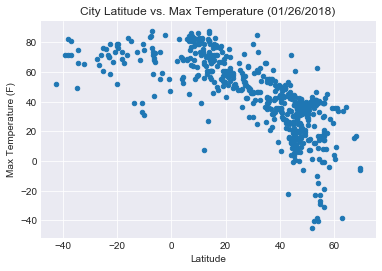

In [16]:
sample_cities.plot(kind="scatter", x="Latitude", y="Temperature")
today_date = datetime.datetime.now()
date_string = today_date.strftime("%m/%d/%Y")
sns.set_style('darkgrid')
plt.title("City Latitude vs. Max Temperature " + "(" + date_string + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

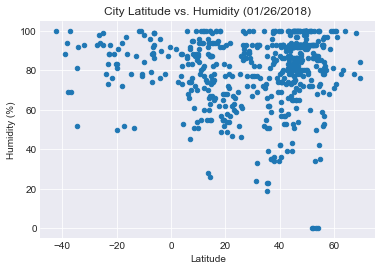

In [13]:
sample_cities.plot(kind="scatter", x="Latitude", y="Humidity")
today_date = datetime.datetime.now()
date_string = today_date.strftime("%m/%d/%Y")
sns.set_style('darkgrid')
plt.title("City Latitude vs. Humidity " + "(" + date_string + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

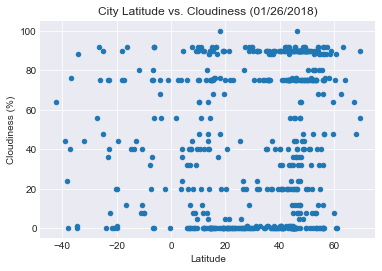

In [14]:
sample_cities.plot(kind="scatter", x="Latitude", y="Cloudiness")
today_date = datetime.datetime.now()
date_string = today_date.strftime("%m/%d/%Y")
sns.set_style('darkgrid')
plt.title("City Latitude vs. Cloudiness " + "(" + date_string + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

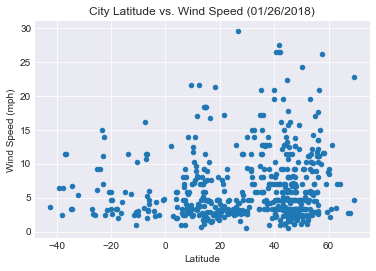

In [15]:
sample_cities.plot(kind="scatter", x="Latitude", y="Wind Speed")
today_date = datetime.datetime.now()
date_string = today_date.strftime("%m/%d/%Y")
sns.set_style('darkgrid')
plt.title("City Latitude vs. Wind Speed " + "(" + date_string + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()